# Obtención de candidatos destacados con Machine Learning

## Preparación de los datos: limpieza de la base de datos

### 1) Cargamos las librerias necesarias para la limpieza

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2) Cargar la base de datos

In [ ]:
df_complete = pd.read_excel('BD RIIEE 2021.xlsx')

In [ ]:
df_complete.head()

,Fecha Acción,PEA,Año Acción,Periodo Acción,País,Tipo de Acción,Acción,ID Evento,Nombre Evento,Institución Acción,...,Apto,Destacado,Ingresados Si/No,Encuadre de Ingreso,Dirección,Área,Potencial Vigente,Información Real/No Real,Vacante Postulada,Ingresó
0,2021-01-01 00:00:00,PEA 20-21,2021,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento,TM,...,Apto,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 00:00:00,PEA 20-21,2021,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 4,U,...,Apto,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-01 00:00:00,PEA 20-21,2021,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 5,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-01 00:00:00,PEA 20-21,2021,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 0,IY,...,Apto,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-01 00:00:00,PEA 20-21,2021,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 4,TM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_complete.shape

(5742, 56)

### 3) Elegir que columnas se quedarán para la realización del modelo

**La columna objetivo o 'target' es la columna de 'Ingresados Si/No'. Buscamos que el modelo de Machine Learning seleccione a los candidatos que considere lo suficientemente aptos para ingresar a Ternium.**

**Identificar los valores nulos por columna: todas aquellas que poseen solamente valores nulos serán eliminadas.**

In [ ]:
missing_values_count = df_complete.isnull().sum()
missing_values_count

Fecha Acción                   0
PEA                            0
Año Acción                     0
Periodo Acción               553
País                           0
Tipo de Acción                 0
Acción                         0
ID Evento                   3149
Nombre Evento                  0
Institución Acción             0
Referente Ternium           4777
Embajador Ternium           5742
ID Candidato                3149
Correo electrónico             1
Correo institucional           1
Nombres                        1
Apellidos                      1
Género                         1
Nacionalidad                2594
Universidad                    0
Carrera/Titulación           595
Carrera Gestional            359
Especialidad                1039
Avance                      1371
Semestres Totales           2103
Status Académico            3147
Postulados Si/No            4256
Evaluados Si/No             4550
VIPS                        5598
NIPS                        5598
Inglés    

**Columnas que se consideran importantes para la construcción del modelo:**

In [ ]:
df = df_complete[['ID Candidato','Periodo Acción','País','Nombre Evento','Institución Acción',
                  'Género','Especialidad','Avance','Semestres Totales','Evaluados Si/No',
                  'Operaciones-Calidad', 'MTTO-DIMA', 'Comercial-Planeamiento', 'DIGI-SC', 'Resto-Soft',
                  'Apto/No Apto', 'Destacado Pym.1','Ingles','Destacado','Ingresados Si/No']]

In [ ]:
df

,ID Candidato,Periodo Acción,País,Nombre Evento,Institución Acción,Género,Especialidad,Avance,Semestres Totales,Evaluados Si/No,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1.012101e+09,Enero-Junio,México,Evento,TM,F,Ingenierías Target,NaN,NaN,Si,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,Si
1,1.012101e+09,Enero-Junio,México,Evento 4,U,F,Ingenierías Target,6,9,Si,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,NaN
2,1.012101e+09,Enero-Junio,México,Evento 5,U,F,Ingenierías Target,8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.012101e+09,Enero-Junio,México,Evento 0,IY,F,Ingenierías Target,6,9,Si,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,5,B2 - High Intermediate,Si,Si
4,1.012101e+09,Enero-Junio,México,Evento 4,TM,F,Negocios,NaN,NaN,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5737,NaN,NaN,Brasil,Evento 83,F,F,Ingenierías Target,NaN,NaN,Sí,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Recommend,NaN,NaN,NaN,NaN,NaN
5738,NaN,NaN,Brasil,Evento 83,F,F,Ingenierías Target,NaN,NaN,Sí,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,NaN,NaN,NaN,NaN,NaN
5739,NaN,NaN,Brasil,Evento 83,F,F,Ingenierías Target,NaN,NaN,Sí,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,NaN,NaN,NaN,NaN,NaN
5740,NaN,NaN,Brasil,Evento 84,J,F,Ingenierías Target,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Estas 20 columnas fueron seleccionadas debido a la información que poseen de cada candidato. De esta manera, sabremos si los candidatos de un específico periodo, evento, género o especialidad son mas susceptibles a ingresar a Ternium.**

### 4) Filtrar la base de datos

**Se filtra la base de datos para solo tener a los candidatos de México y de aquellos que fueron evaluados. Igualmente, queremos solamente a los candidatos que tengan un avance de 5 semestres en su carrera.**

In [ ]:
df = df[df['País']== 'México']

In [ ]:
df = df[df['Evaluados Si/No'] == 'Si']

In [ ]:
df

,ID Candidato,Periodo Acción,País,Nombre Evento,Institución Acción,Género,Especialidad,Avance,Semestres Totales,Evaluados Si/No,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1.012101e+09,Enero-Junio,México,Evento,TM,F,Ingenierías Target,NaN,NaN,Si,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,Si
1,1.012101e+09,Enero-Junio,México,Evento 4,U,F,Ingenierías Target,6,9,Si,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,NaN
3,1.012101e+09,Enero-Junio,México,Evento 0,IY,F,Ingenierías Target,6,9,Si,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,5,B2 - High Intermediate,Si,Si
4,1.012101e+09,Enero-Junio,México,Evento 4,TM,F,Negocios,NaN,NaN,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.012101e+09,Enero-Junio,México,Evento 0,IY,M,Ingenierías Target,6,9,Si,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,NaN,Julio-Diciembre,México,Evento 68,U,F,NaN,5,9,Si,Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Highly Recommend,Apto,4,NaN,Si,Si
4785,NaN,Julio-Diciembre,México,Evento 68,RR,M,NaN,9,12 o más,Si,Do Not Recommend,Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,0,NaN,NaN,NaN
4789,NaN,Julio-Diciembre,México,Evento 68,RR,F,NaN,7,10,Si,Highly Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Apto,2,NaN,NaN,NaN
4790,NaN,Julio-Diciembre,México,Evento 68,RR,M,NaN,8,9,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**La base de datos se reduce de 5742 filas a tan solo 1050. Despues de esto, podemos eliminar ambas columnas.**

In [ ]:
df = df.drop(columns = ['País'])

In [ ]:
df = df.drop(columns = ['Evaluados Si/No'])

In [ ]:
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Avance,Semestres Totales,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1.012101e+09,Enero-Junio,Evento,TM,F,Ingenierías Target,NaN,NaN,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,Si
1,1.012101e+09,Enero-Junio,Evento 4,U,F,Ingenierías Target,6,9,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,NaN
3,1.012101e+09,Enero-Junio,Evento 0,IY,F,Ingenierías Target,6,9,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,5,B2 - High Intermediate,Si,Si
4,1.012101e+09,Enero-Junio,Evento 4,TM,F,Negocios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.012101e+09,Enero-Junio,Evento 0,IY,M,Ingenierías Target,6,9,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,NaN,Julio-Diciembre,Evento 68,U,F,NaN,5,9,Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Highly Recommend,Apto,4,NaN,Si,Si
4785,NaN,Julio-Diciembre,Evento 68,RR,M,NaN,9,12 o más,Do Not Recommend,Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,0,NaN,NaN,NaN
4789,NaN,Julio-Diciembre,Evento 68,RR,F,NaN,7,10,Highly Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Apto,2,NaN,NaN,NaN
4790,NaN,Julio-Diciembre,Evento 68,RR,M,NaN,8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5)  Eliminar registros duplicados

In [ ]:
print('Dataset con duplicados: ' + str(df.shape))
df = df.drop_duplicates(ignore_index = True)
print ('Dataset sin duplicados: ' + str(df.shape))

Dataset con duplicados: (1050, 18)
Dataset sin duplicados: (947, 18)


In [ ]:
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Avance,Semestres Totales,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1.012101e+09,Enero-Junio,Evento,TM,F,Ingenierías Target,NaN,NaN,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,Si
1,1.012101e+09,Enero-Junio,Evento 4,U,F,Ingenierías Target,6,9,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,NaN
2,1.012101e+09,Enero-Junio,Evento 0,IY,F,Ingenierías Target,6,9,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,5,B2 - High Intermediate,Si,Si
3,1.012101e+09,Enero-Junio,Evento 4,TM,F,Negocios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.012101e+09,Enero-Junio,Evento 0,IY,M,Ingenierías Target,6,9,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,NaN,Julio-Diciembre,Evento 68,U,F,NaN,5,9,Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Highly Recommend,Apto,4,NaN,Si,Si
943,NaN,Julio-Diciembre,Evento 68,RR,M,NaN,9,12 o más,Do Not Recommend,Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,0,NaN,NaN,NaN
944,NaN,Julio-Diciembre,Evento 68,RR,F,NaN,7,10,Highly Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Apto,2,NaN,NaN,NaN
945,NaN,Julio-Diciembre,Evento 68,RR,M,NaN,8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**La base de datos pasó de tener 1050 registros a 947 registros, esto indica que existían 103 registros duplicados.**

### 6) Corregir datos érroneos y convetir a datos numéricos.

**Analizamos cuales columnas poseen valores nulos:**

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

ID Candidato              438
Periodo Acción              0
Nombre Evento               0
Institución Acción          0
Género                      0
Especialidad               59
Avance                    111
Semestres Totales         177
Operaciones-Calidad       149
MTTO-DIMA                 149
Comercial-Planeamiento    149
DIGI-SC                   149
Resto-Soft                149
Apto/No Apto              540
Destacado Pym.1           608
Ingles                    823
Destacado                 876
Ingresados Si/No          874
dtype: int64

**Comenzando con la columna de 'ID Candidato': asignamos nuevos ID's a los candidatos en la base de datos**

In [ ]:
id_new = pd.Series(list(range(1,len(df)+1)))
df['ID Candidato'] = id_new
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Avance,Semestres Totales,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,Enero-Junio,Evento,TM,F,Ingenierías Target,NaN,NaN,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,Si
1,2,Enero-Junio,Evento 4,U,F,Ingenierías Target,6,9,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,NaN
2,3,Enero-Junio,Evento 0,IY,F,Ingenierías Target,6,9,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,5,B2 - High Intermediate,Si,Si
3,4,Enero-Junio,Evento 4,TM,F,Negocios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Enero-Junio,Evento 0,IY,M,Ingenierías Target,6,9,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,943,Julio-Diciembre,Evento 68,U,F,NaN,5,9,Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Highly Recommend,Apto,4,NaN,Si,Si
943,944,Julio-Diciembre,Evento 68,RR,M,NaN,9,12 o más,Do Not Recommend,Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,0,NaN,NaN,NaN
944,945,Julio-Diciembre,Evento 68,RR,F,NaN,7,10,Highly Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Apto,2,NaN,NaN,NaN
945,946,Julio-Diciembre,Evento 68,RR,M,NaN,8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Continuando con la columna 'Periodo Acción', se le asignarán los siguientes números:**

1: Enero-Junio

2: Julio-Diciembre

In [ ]:
df = df.replace('Enero-Junio',1)

In [ ]:
df = df.replace('Julio-Diciembre',2)

In [ ]:
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Avance,Semestres Totales,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,1,Evento,TM,F,Ingenierías Target,NaN,NaN,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,Si
1,2,1,Evento 4,U,F,Ingenierías Target,6,9,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,NaN
2,3,1,Evento 0,IY,F,Ingenierías Target,6,9,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,5,B2 - High Intermediate,Si,Si
3,4,1,Evento 4,TM,F,Negocios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,Evento 0,IY,M,Ingenierías Target,6,9,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,943,2,Evento 68,U,F,NaN,5,9,Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Highly Recommend,Apto,4,NaN,Si,Si
943,944,2,Evento 68,RR,M,NaN,9,12 o más,Do Not Recommend,Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,0,NaN,NaN,NaN
944,945,2,Evento 68,RR,F,NaN,7,10,Highly Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Apto,2,NaN,NaN,NaN
945,946,2,Evento 68,RR,M,NaN,8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Para la columna de 'Nombre Evento', eliminamos la palabra 'Evento' en toda la columna:**

In [ ]:
df['Nombre Evento'] = df['Nombre Evento'].str[7:]
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Avance,Semestres Totales,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,1,,TM,F,Ingenierías Target,NaN,NaN,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,Si
1,2,1,4,U,F,Ingenierías Target,6,9,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,NaN
2,3,1,0,IY,F,Ingenierías Target,6,9,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,5,B2 - High Intermediate,Si,Si
3,4,1,4,TM,F,Negocios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,0,IY,M,Ingenierías Target,6,9,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,943,2,68,U,F,NaN,5,9,Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Highly Recommend,Apto,4,NaN,Si,Si
943,944,2,68,RR,M,NaN,9,12 o más,Do Not Recommend,Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,0,NaN,NaN,NaN
944,945,2,68,RR,F,NaN,7,10,Highly Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Apto,2,NaN,NaN,NaN
945,946,2,68,RR,M,NaN,8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.replace({'Nombre Evento': ''}, '69')
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Avance,Semestres Totales,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,1,69,TM,F,Ingenierías Target,NaN,NaN,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,Si
1,2,1,4,U,F,Ingenierías Target,6,9,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,NaN
2,3,1,0,IY,F,Ingenierías Target,6,9,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,5,B2 - High Intermediate,Si,Si
3,4,1,4,TM,F,Negocios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,0,IY,M,Ingenierías Target,6,9,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,943,2,68,U,F,NaN,5,9,Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Highly Recommend,Apto,4,NaN,Si,Si
943,944,2,68,RR,M,NaN,9,12 o más,Do Not Recommend,Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,0,NaN,NaN,NaN
944,945,2,68,RR,F,NaN,7,10,Highly Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Apto,2,NaN,NaN,NaN
945,946,2,68,RR,M,NaN,8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.astype({"Nombre Evento": int}, errors='raise')

**A la columna 'Institución Acción' se le asignan los siguientes números:**

0: CL

1: G

2: I

3: IM

4: IP

5: IY

6: M

7: R

8: RR

9: T

10: TM

11: U

12: UL

13: UM

14: UP

In [ ]:
df = df.replace({'Institución Acción': 'CL'}, 0)
df = df.replace({'Institución Acción': 'G'}, 1)
df = df.replace({'Institución Acción': 'I'}, 2)
df = df.replace({'Institución Acción': 'IM'}, 3)
df = df.replace({'Institución Acción': 'IP'}, 4)
df = df.replace({'Institución Acción': 'IY'}, 5)
df = df.replace({'Institución Acción': 'M'}, 6)
df = df.replace({'Institución Acción': 'R'}, 7)
df = df.replace({'Institución Acción': 'RR'}, 8)
df = df.replace({'Institución Acción': 'T'}, 9)
df = df.replace({'Institución Acción': 'TM'}, 10)
df = df.replace({'Institución Acción': 'U'}, 11)
df = df.replace({'Institución Acción': 'UL'}, 12)
df = df.replace({'Institución Acción': 'UM'}, 13)
df = df.replace({'Institución Acción': 'UP'}, 14)
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Avance,Semestres Totales,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,1,69,10,F,Ingenierías Target,NaN,NaN,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,Si
1,2,1,4,11,F,Ingenierías Target,6,9,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,NaN
2,3,1,0,5,F,Ingenierías Target,6,9,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,5,B2 - High Intermediate,Si,Si
3,4,1,4,10,F,Negocios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,0,5,M,Ingenierías Target,6,9,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,943,2,68,11,F,NaN,5,9,Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Highly Recommend,Apto,4,NaN,Si,Si
943,944,2,68,8,M,NaN,9,12 o más,Do Not Recommend,Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,0,NaN,NaN,NaN
944,945,2,68,8,F,NaN,7,10,Highly Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Apto,2,NaN,NaN,NaN
945,946,2,68,8,M,NaN,8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**A la columna 'Género' se le asignan los siguientes números:**

0: M

1: F

In [ ]:
df = df.replace({'Género': "M"}, 0)
df = df.replace({'Género': "F"}, 1)
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Avance,Semestres Totales,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,1,69,10,1,Ingenierías Target,NaN,NaN,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,Si
1,2,1,4,11,1,Ingenierías Target,6,9,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,NaN
2,3,1,0,5,1,Ingenierías Target,6,9,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,5,B2 - High Intermediate,Si,Si
3,4,1,4,10,1,Negocios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,0,5,0,Ingenierías Target,6,9,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,943,2,68,11,1,NaN,5,9,Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Highly Recommend,Apto,4,NaN,Si,Si
943,944,2,68,8,0,NaN,9,12 o más,Do Not Recommend,Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,0,NaN,NaN,NaN
944,945,2,68,8,1,NaN,7,10,Highly Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Apto,2,NaN,NaN,NaN
945,946,2,68,8,0,NaN,8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Para la columna de 'Especialidad', los valores nulos entran en la categoría de 'Otras'. Las especialidades tienen asignados los siguientes números:**

Ingenierías Target          = 0

Otras Ingenierías           = 1

Otras                       = 2

Negocios                    = 3

Sistemas                    = 4

Tecnologías de Información  = 5

Minería                     = 6

In [ ]:
df["Especialidad"][df["Especialidad"].isnull() == True] = "Otras"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df = df.replace({'Especialidad': "Ingenierías Target"}, 0)
df = df.replace({'Especialidad': "Otras Ingenierías"}, 1)
df = df.replace({'Especialidad': "Otras"}, 2)
df = df.replace({'Especialidad': "Negocios"}, 3)
df = df.replace({'Especialidad': "Sistemas"}, 4)
df = df.replace({'Especialidad': "Tecnologías de Información"}, 5)
df = df.replace({'Especialidad': "Minería"}, 6)
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Avance,Semestres Totales,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,1,69,10,1,0,NaN,NaN,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,Si
1,2,1,4,11,1,0,6,9,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,NaN
2,3,1,0,5,1,0,6,9,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,5,B2 - High Intermediate,Si,Si
3,4,1,4,10,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,0,5,0,0,6,9,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,943,2,68,11,1,2,5,9,Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Highly Recommend,Apto,4,NaN,Si,Si
943,944,2,68,8,0,2,9,12 o más,Do Not Recommend,Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,0,NaN,NaN,NaN
944,945,2,68,8,1,2,7,10,Highly Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Apto,2,NaN,NaN,NaN
945,946,2,68,8,0,2,8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Para la columna de 'Avance' es necesario corregir los valores nulos para posteriormente realizar un nuevo filtrado de la base de datos. Ternium solo puede aceptar candidatos cuyo avance es mayor o igual a 5 semestres.**

In [ ]:
# Obtener index de "egresado"
x = df.index[df['Avance'] == "Egresado"].tolist()
x

[306, 415, 442, 443, 447, 468, 532, 537, 540, 669, 681]

In [ ]:
# Igualar a 10 en "Avance", "Semestres totales" del los indices
df["Semestres Totales"][x] = 10
df["Avance"][x] = 10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Limpiar 12 o mas (elemento unico)
df = df.replace({'Semestres Totales': "12 o más"}, 12)

In [ ]:
# Obtener medias
Semestres_nonan = df["Semestres Totales"].dropna().astype(int)
Avance_nonan = df["Avance"].dropna().astype(int)
Semestres_mean = round(Semestres_nonan.mean())
Avance_mean = round(Avance_nonan.mean())

In [ ]:
# Remplazar nan con medias
df['Semestres Totales'] = df['Semestres Totales'].fillna(Semestres_mean)
df['Avance'] = df['Avance'].fillna(Avance_mean)

In [ ]:
# Limpiar y convertir a int
df["Avance"] = df["Avance"].apply(str)
df["Semestres Totales"] = df["Semestres Totales"].apply(str)

df["Avance"] = df["Avance"].astype(int)
df["Semestres Totales"] = df["Semestres Totales"].astype(int)

In [ ]:
# Filtrar avance mayor que 5
df = df[df['Avance'] > 5]

In [ ]:
# Crear nueva columna "semestres restantes"
df["Semestres Restantes"] = df["Semestres Totales"]  - df["Avance"]

In [ ]:
# Eliminar columnas antiguas
del df["Semestres Totales"]
del df["Avance"]

In [ ]:
# Ponemos las columnas en el orden correcto
df = df[['ID Candidato','Periodo Acción','Nombre Evento','Institución Acción',
        'Género','Especialidad','Semestres Restantes','Operaciones-Calidad',
        'MTTO-DIMA', 'Comercial-Planeamiento', 'DIGI-SC', 'Resto-Soft',
        'Apto/No Apto', 'Destacado Pym.1','Ingles','Destacado','Ingresados Si/No']]
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Semestres Restantes,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,1,69,10,1,0,2,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,Si
1,2,1,4,11,1,0,3,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,5,B2 - High Intermediate,Si,NaN
2,3,1,0,5,1,0,3,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,5,B2 - High Intermediate,Si,Si
3,4,1,4,10,1,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,0,5,0,0,3,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,942,2,68,11,0,2,3,Do Not Recommend,Do Not Recommend,Do Not Recommend,Recommend,Do Not Recommend,Apto,0,NaN,NaN,NaN
943,944,2,68,8,0,2,3,Do Not Recommend,Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,0,NaN,NaN,NaN
944,945,2,68,8,1,2,3,Highly Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Apto,2,NaN,NaN,NaN
945,946,2,68,8,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Para las siguientes 5 columnas, 'Operaciones-Calidad','MTTO-DIMA','Comercial-Planeamiento','DIGI-SC' y 'Resto-Soft', se eliminan las filas que contienen valores nulos (se identificó que si una columna tiene valor nulo, esto se repite en las otras 4).**

In [ ]:
df = df[df['MTTO-DIMA'].notna()]

**Los valores númericos asignados a estas columnas son los siguientes:**

Highly Recommend = 2

Recommend = 1

Do Not Recommend = 0

In [ ]:
df = df.replace('Highly Recommend',2)
df = df.replace('Recommend',1)
df = df.replace('Do Not Recommend',0)
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Semestres Restantes,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,1,69,10,1,0,2,2,1,2,0,0,Apto,5,B2 - High Intermediate,Si,Si
1,2,1,4,11,1,0,3,2,0,0,0,0,Apto,5,B2 - High Intermediate,Si,NaN
2,3,1,0,5,1,0,3,2,2,0,1,2,Apto,5,B2 - High Intermediate,Si,Si
4,5,1,0,5,0,0,3,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
5,6,1,69,12,1,0,1,2,0,1,2,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,2,68,11,1,2,2,0,1,1,2,0,Apto,4,NaN,Si,Si
941,942,2,68,11,0,2,3,0,0,0,1,0,Apto,0,NaN,NaN,NaN
943,944,2,68,8,0,2,3,0,1,0,0,0,Apto,0,NaN,NaN,NaN
944,945,2,68,8,1,2,3,2,2,0,0,2,Apto,2,NaN,NaN,NaN


**Para la columna de 'Apto/No Apto', Ternium menciona que si el candidato aparece como no recomendado en las 5 columnas, no es apto para continuar. Los valores numericos son los siguientes:**

Apto = 1

No Apto = 0

In [ ]:
a = 0
df['Apto/No Apto'] = np.where ( (df["Operaciones-Calidad"] == a) & (df['MTTO-DIMA'] == a) & (df['Comercial-Planeamiento']==a) & (df['DIGI-SC'] ==a) & (df['Resto-Soft'] == a ) , "No Apto", "Apto")
df = df.replace('Apto',1)
df = df.replace('No Apto',0)
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Semestres Restantes,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,1,69,10,1,0,2,2,1,2,0,0,1,5,B2 - High Intermediate,Si,Si
1,2,1,4,11,1,0,3,2,0,0,0,0,1,5,B2 - High Intermediate,Si,NaN
2,3,1,0,5,1,0,3,2,2,0,1,2,1,5,B2 - High Intermediate,Si,Si
4,5,1,0,5,0,0,3,0,0,0,0,0,0,NaN,NaN,NaN,NaN
5,6,1,69,12,1,0,1,2,0,1,2,1,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,2,68,11,1,2,2,0,1,1,2,0,1,4,NaN,Si,Si
941,942,2,68,11,0,2,3,0,0,0,1,0,1,0,NaN,NaN,NaN
943,944,2,68,8,0,2,3,0,1,0,0,0,1,0,NaN,NaN,NaN
944,945,2,68,8,1,2,3,2,2,0,0,2,1,2,NaN,NaN,NaN


**Para la columna de 'Destacado Pym.1', Ternium menciona que si el candidato es altamente recomendado en alguna de las primeras 4 columnas, es destacado. Los valores numéricos asignados son los siguientes:**

Destacado = 1

No destacado = 0

In [ ]:
a = 2

df['Destacado Pym.1'] = np.where ( (df["Operaciones-Calidad"] == a) | (df['MTTO-DIMA'] == a) | (df['Comercial-Planeamiento']==a) | (df['DIGI-SC'] ==a) , "Destacado", "No Destacado")
df = df.replace('Destacado',1)
df = df.replace('No Destacado',0)
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Semestres Restantes,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,1,69,10,1,0,2,2,1,2,0,0,1,1,B2 - High Intermediate,Si,Si
1,2,1,4,11,1,0,3,2,0,0,0,0,1,1,B2 - High Intermediate,Si,NaN
2,3,1,0,5,1,0,3,2,2,0,1,2,1,1,B2 - High Intermediate,Si,Si
4,5,1,0,5,0,0,3,0,0,0,0,0,0,0,NaN,NaN,NaN
5,6,1,69,12,1,0,1,2,0,1,2,1,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,2,68,11,1,2,2,0,1,1,2,0,1,1,NaN,Si,Si
941,942,2,68,11,0,2,3,0,0,0,1,0,1,0,NaN,NaN,NaN
943,944,2,68,8,0,2,3,0,1,0,0,0,1,0,NaN,NaN,NaN
944,945,2,68,8,1,2,3,2,2,0,0,2,1,1,NaN,NaN,NaN


**Para la columna 'Ingles', se asignan los siguientes valores numéricos:**

False beginner = 0

Late hangup = 1

A1 = 2

A2 = 3

B1 = 4

B2 = 5

C1 = 6

C2 = 7

**De igual manera, se le asigna la moda a los valores nulos:**

In [ ]:
df = df.replace('False Beginner',0)
df = df.replace('Late hangup',1)
df = df.replace('A1 - Low Beginner',2)
df = df.replace('A2 - High Beginner',3)
df = df.replace('B1 - Low Intermediate',4)
df = df.replace('B2 - High Intermediate',5)
df = df.replace('C1 - Advanced',6)
df = df.replace('C2 - Mastery',7)

df['Ingles'] = df['Ingles'].fillna(3) #asignar moda a nulls

df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Semestres Restantes,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,1,69,10,1,0,2,2,1,2,0,0,1,1,5.0,Si,Si
1,2,1,4,11,1,0,3,2,0,0,0,0,1,1,5.0,Si,NaN
2,3,1,0,5,1,0,3,2,2,0,1,2,1,1,5.0,Si,Si
4,5,1,0,5,0,0,3,0,0,0,0,0,0,0,3.0,NaN,NaN
5,6,1,69,12,1,0,1,2,0,1,2,1,1,1,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,2,68,11,1,2,2,0,1,1,2,0,1,1,3.0,Si,Si
941,942,2,68,11,0,2,3,0,0,0,1,0,1,0,3.0,NaN,NaN
943,944,2,68,8,0,2,3,0,1,0,0,0,1,0,3.0,NaN,NaN
944,945,2,68,8,1,2,3,2,2,0,0,2,1,1,3.0,NaN,NaN


**Para la columna de 'Destacado', Ternium menciona que si un candidato tiene un nivel de ingles mayor a B1, es destacado. Los valores numéricos asignados son los siguientes:**

Destacado = 1

No Destacado = 0

In [ ]:
df['Destacado'] = np.where ( (df["Ingles"] >= 4), 1, 0)
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Semestres Restantes,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,1,69,10,1,0,2,2,1,2,0,0,1,1,5.0,1,Si
1,2,1,4,11,1,0,3,2,0,0,0,0,1,1,5.0,1,NaN
2,3,1,0,5,1,0,3,2,2,0,1,2,1,1,5.0,1,Si
4,5,1,0,5,0,0,3,0,0,0,0,0,0,0,3.0,0,NaN
5,6,1,69,12,1,0,1,2,0,1,2,1,1,1,3.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,2,68,11,1,2,2,0,1,1,2,0,1,1,3.0,0,Si
941,942,2,68,11,0,2,3,0,0,0,1,0,1,0,3.0,0,NaN
943,944,2,68,8,0,2,3,0,1,0,0,0,1,0,3.0,0,NaN
944,945,2,68,8,1,2,3,2,2,0,0,2,1,1,3.0,0,NaN


**Finalmente, para la columna de 'Ingresados Si/No' simplemente vamos a asignar 'No' a los valores nulos. Los valores numéricos son los siguientes:**

Si = 1

No = 0

In [ ]:
df['Ingresados Si/No'] = df['Ingresados Si/No'].fillna(0)
df = df.replace('Si',1)
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Semestres Restantes,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,1,69,10,1,0,2,2,1,2,0,0,1,1,5.0,1,1
1,2,1,4,11,1,0,3,2,0,0,0,0,1,1,5.0,1,0
2,3,1,0,5,1,0,3,2,2,0,1,2,1,1,5.0,1,1
4,5,1,0,5,0,0,3,0,0,0,0,0,0,0,3.0,0,0
5,6,1,69,12,1,0,1,2,0,1,2,1,1,1,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,2,68,11,1,2,2,0,1,1,2,0,1,1,3.0,0,1
941,942,2,68,11,0,2,3,0,0,0,1,0,1,0,3.0,0,0
943,944,2,68,8,0,2,3,0,1,0,0,0,1,0,3.0,0,0
944,945,2,68,8,1,2,3,2,2,0,0,2,1,1,3.0,0,0


**Ajustamos el ID para evitar inconvenientes del filtrado realizado:**

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
id_new = pd.Series(list(range(1,len(df)+1)))
df['ID Candidato'] = id_new
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Semestres Restantes,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,1,69,10,1,0,2,2,1,2,0,0,1,1,5.0,1,1
1,2,1,4,11,1,0,3,2,0,0,0,0,1,1,5.0,1,0
2,3,1,0,5,1,0,3,2,2,0,1,2,1,1,5.0,1,1
3,4,1,0,5,0,0,3,0,0,0,0,0,0,0,3.0,0,0
4,5,1,69,12,1,0,1,2,0,1,2,1,1,1,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,720,2,68,11,1,2,2,0,1,1,2,0,1,1,3.0,0,1
720,721,2,68,11,0,2,3,0,0,0,1,0,1,0,3.0,0,0
721,722,2,68,8,0,2,3,0,1,0,0,0,1,0,3.0,0,0
722,723,2,68,8,1,2,3,2,2,0,0,2,1,1,3.0,0,0


**De esta manera, ya no hay columnas con valores nulos:**

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

ID Candidato              0
Periodo Acción            0
Nombre Evento             0
Institución Acción        0
Género                    0
Especialidad              0
Semestres Restantes       0
Operaciones-Calidad       0
MTTO-DIMA                 0
Comercial-Planeamiento    0
DIGI-SC                   0
Resto-Soft                0
Apto/No Apto              0
Destacado Pym.1           0
Ingles                    0
Destacado                 0
Ingresados Si/No          0
dtype: int64

**Finalmente, convertimos toda la base de datos a entero:**

In [ ]:
df = df.astype(int)
df

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Semestres Restantes,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1,1,69,10,1,0,2,2,1,2,0,0,1,1,5,1,1
1,2,1,4,11,1,0,3,2,0,0,0,0,1,1,5,1,0
2,3,1,0,5,1,0,3,2,2,0,1,2,1,1,5,1,1
3,4,1,0,5,0,0,3,0,0,0,0,0,0,0,3,0,0
4,5,1,69,12,1,0,1,2,0,1,2,1,1,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,720,2,68,11,1,2,2,0,1,1,2,0,1,1,3,0,1
720,721,2,68,11,0,2,3,0,0,0,1,0,1,0,3,0,0
721,722,2,68,8,0,2,3,0,1,0,0,0,1,0,3,0,0
722,723,2,68,8,1,2,3,2,2,0,0,2,1,1,3,0,0


# Generación de modelos de aprendizaje y su evaluación

### Selección de características importantes para el modelo de Machine Learning (Feature Selection)

**Primeramente, se le aplicará un escalamiento a los datos para asi mejorar el rendimiento de los modelos de Machine Learning**

In [ ]:
#Escalamiendo Minimo maximo ----sensible a valores atípicos
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit_transform(df)
scaled_frame = pd.DataFrame(minmax_scale,columns=df.columns)
scaled_frame.head()

,ID Candidato,Periodo Acción,Nombre Evento,Institución Acción,Género,Especialidad,Semestres Restantes,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,0.000000,0.0,1.000000,0.714286,1.0,0.0,0.666667,1.0,0.5,1.0,0.0,0.0,1.0,1.0,0.714286,1.0,1.0
1,0.001383,0.0,0.057971,0.785714,1.0,0.0,0.833333,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.714286,1.0,0.0
2,0.002766,0.0,0.000000,0.357143,1.0,0.0,0.833333,1.0,1.0,0.0,0.5,1.0,1.0,1.0,0.714286,1.0,1.0
3,0.004149,0.0,0.000000,0.357143,0.0,0.0,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428571,0.0,0.0
4,0.005533,0.0,1.000000,0.857143,1.0,0.0,0.500000,1.0,0.0,0.5,1.0,0.5,1.0,1.0,0.428571,0.0,0.0


**Se obtiene una tabla de correlación para saber que tan relacionadas están las variables entre sí**

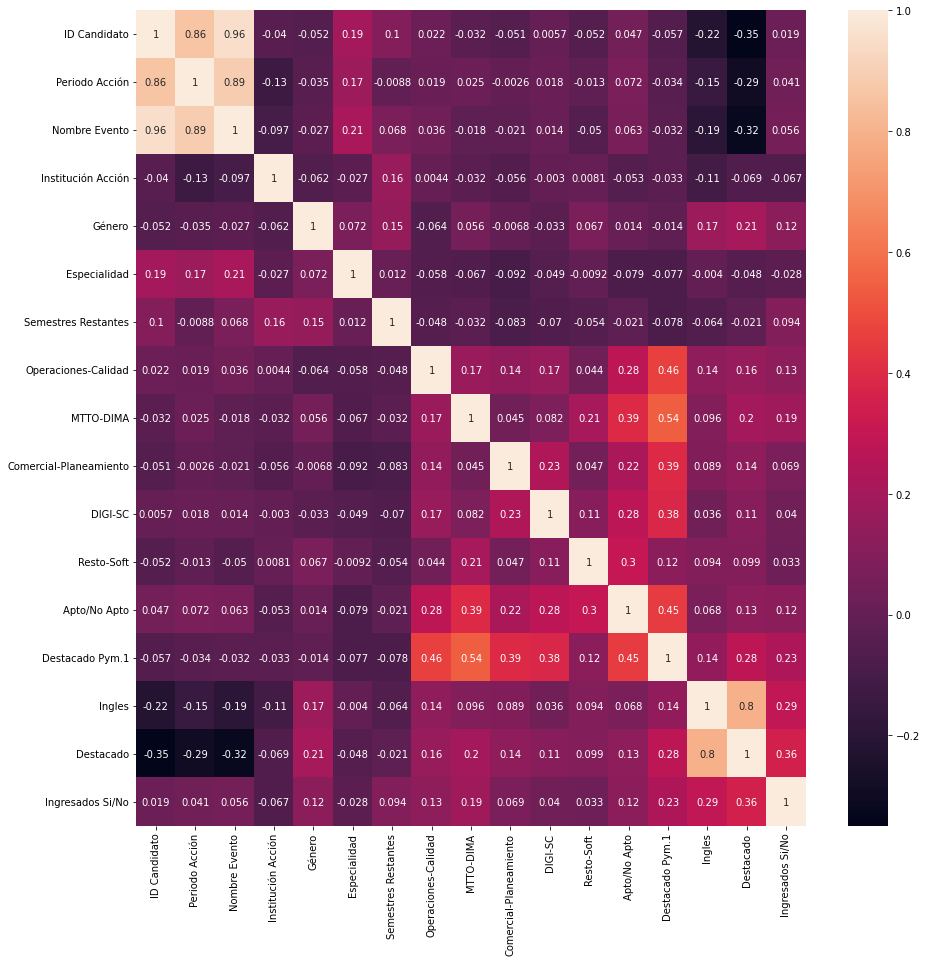

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(scaled_frame.corr(method= 'pearson'), annot=True, ax=ax)

**Para aplicar el algoritmo de selección de caracteristicas Chi-Cuadrado, es necesario establecer que la columna target es 'Ingresados Si/No'**

In [ ]:
X = scaled_frame.drop('Ingresados Si/No', axis=1)
y = scaled_frame['Ingresados Si/No']

In [ ]:
#Chi-cuadrado (filtrado)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(X, y)
np.set_printoptions(precision=3)
print(fit.scores_)

[4.599e-02 6.813e-01 3.028e-01 4.178e-01 7.215e+00 2.451e-01 4.274e-01
 7.625e+00 1.136e+01 2.321e+00 6.511e-01 4.275e-01 1.522e+00 1.724e+01
 2.000e+00 8.268e+01]


**Decidimos quedarnos con las 11 columnas con el score más alto, las cuales son las siguientes:**

In [ ]:
df_modelo = scaled_frame[['Género', 'Operaciones-Calidad', 'MTTO-DIMA', 'Comercial-Planeamiento', 'DIGI-SC', 'Resto-Soft',
       'Apto/No Apto', 'Destacado Pym.1', 'Ingles', 'Destacado', 'Ingresados Si/No']]
df_modelo

,Género,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym.1,Ingles,Destacado,Ingresados Si/No
0,1.0,1.0,0.5,1.0,0.0,0.0,1.0,1.0,0.714286,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.714286,1.0,0.0
2,1.0,1.0,1.0,0.0,0.5,1.0,1.0,1.0,0.714286,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428571,0.0,0.0
4,1.0,1.0,0.0,0.5,1.0,0.5,1.0,1.0,0.428571,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
719,1.0,0.0,0.5,0.5,1.0,0.0,1.0,1.0,0.428571,0.0,1.0
720,0.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,0.428571,0.0,0.0
721,0.0,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.428571,0.0,0.0
722,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.428571,0.0,0.0


**1) Incluye un resumen con la descripción de las variables relevantes para el análisis**

Las variables relevantes para el análisis son las siguientes:

- Género: Indica si el candidato es hombre o mujer.
- Operaciones-Calidad / MTTO-DIMA / Comercial-Planeamiento / DIGI-SC / Resto-Soft: indica si el candidato es altamente recomendado, recomendado o no recomendado en las 5 áreas.
- Apto/No Apto: indica si el candidato es apto o no según los resultados de las 5 áreas.
- Destacado Pym.1: indica si el candidato es destacado según los resultados de las 5 áreas.
- Ingles: indica el nivel de inglés del candidato.
- Destacado: indica si el nivel de ingles del candidato es destacado.
- Ingresados Si/No: indica si el candidato ingresó a trabajar a Ternium o no.

**2) Define la variable target, o de respuesta (dependiente) y las features o variables predictoras (independientes)**

La variable target será la columna 'Ingresados Si/No', mientras que las variables predictoras serán todas las demás columas.

In [ ]:
X = scaled_frame.drop('Ingresados Si/No', axis=1)
y = scaled_frame['Ingresados Si/No']

**3) Define qué tipos de modelos debes utilizar, de regresión ó de clasificación. Justifica tu respuesta.**

Se utilizarán modelos de clasificación debido a que solo se requiere saber si el candidato cumple las características necesarias para ingresar a Ternium. Los modelos indicarán si el candidato pertenece a la clase de 'Si ingresó' o 'No ingresó'.

**4) Define el dataset para entrenamiento y prueba.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df['Ingresados Si/No'], random_state=0)

**5) Realiza varias veces los siguientes pasos, para tratar de encontrar el mejor modelo de predicción:**
- Prueba todos los modelos de clasificación vistos en clase para generar predicciones. Al utilizar árboles de decisión, genera también la imagen del mismo.
- Calcula y utiliza métricas para comparar los modelos: accuracy, matriz de confusión, precisión, sensitividad, especificidad, ROC-AUC
- Realiza ajuste de hiperparámetros de los modelos y evalúalos de nuevo, probando de nuevo los modelos considerando los ajustes realizados.
- Implementa procedimiento de validación cruzada para tus modelos

***K Nearest Neighbors***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
algoritmo = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo K-NN:')
print(accuracy)

Exactitud del modelo K-NN:
0.9060773480662984


In [ ]:
from sklearn import metrics

print('Matriz de confusión:')
print(metrics.confusion_matrix(y_test, y_pred))

confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

print('Classification error:',1 - metrics.accuracy_score(y_test, y_pred))

print('Sensitivity: ',metrics.recall_score(y_test, y_pred))

specificity = TN / (TN + FP)
print('Specificity: ',specificity)

print('False positive rate:',1 - specificity)

print('Precision: ',metrics.precision_score(y_test, y_pred))

Matriz de confusión:
[[163   4]
 [ 13   1]]
Accuracy:  0.9060773480662984
Classification error: 0.09392265193370164
Sensitivity:  0.07142857142857142
Specificity:  0.9760479041916168
False positive rate: 0.0239520958083832
Precision:  0.2


In [ ]:
algoritmo.predict_proba(X_test)[0:10, 1]

array([0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

AUC: 0.7509735413839891


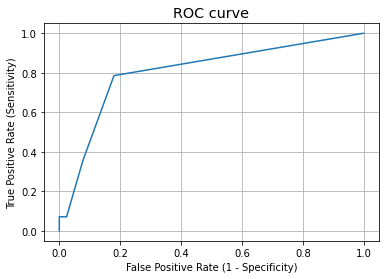

In [ ]:
y_pred_prob = algoritmo.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

from sklearn.model_selection import cross_val_score
print('AUC:',cross_val_score(algoritmo, X, y, cv=10, scoring='roc_auc').mean())

Aplicamos el ajuste de hiperparámetros para ver si el modelo puede mejorar:

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}


gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

g_res = gs.fit(X_train, y_train)
print(g_res.best_score_)
print(g_res.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
0.9208103130755064
{'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 13, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=13, weights='distance')

In [ ]:
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)
print('Accuracy de KNN con hiperparámetros: ',metrics.accuracy_score(y_test, y_knn))

Accuracy de KNN con hiperparámetros:  0.9171270718232044


Al realizar el ajuste, la exactitud sube de 0.906 a 0.917.

***Naive Bayes***

In [ ]:
from sklearn.naive_bayes import GaussianNB
algoritmo = GaussianNB()
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo Naive-Bayes:')
print(accuracy)

Exactitud del modelo Naive-Bayes:
0.48066298342541436


In [ ]:
from sklearn import metrics

print('Matriz de confusión:')
print(metrics.confusion_matrix(y_test, y_pred))

confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

print('Classification error:',1 - metrics.accuracy_score(y_test, y_pred))

print('Sensitivity: ',metrics.recall_score(y_test, y_pred))

specificity = TN / (TN + FP)
print('Specificity: ',specificity)

print('False positive rate:',1 - specificity)

print('Precision: ',metrics.precision_score(y_test, y_pred))

Matriz de confusión:
[[74 93]
 [ 1 13]]
Accuracy:  0.48066298342541436
Classification error: 0.5193370165745856
Sensitivity:  0.9285714285714286
Specificity:  0.4431137724550898
False positive rate: 0.5568862275449102
Precision:  0.12264150943396226


In [ ]:
algoritmo.predict_proba(X_test)[0:10, 1]

array([1.   , 0.994, 0.068, 0.998, 0.   , 0.175, 0.997, 0.118, 0.   ,
       0.999])

AUC: 0.8431908638625056


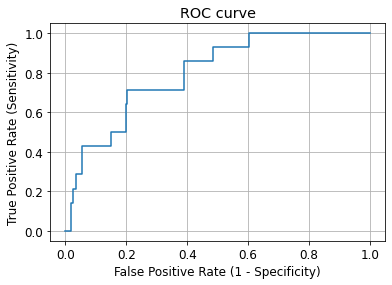

In [ ]:
y_pred_prob = algoritmo.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

from sklearn.model_selection import cross_val_score
print('AUC:',cross_val_score(algoritmo, X, y, cv=10, scoring='roc_auc').mean())

***SVC***

In [ ]:
from sklearn.svm import SVC
algoritmo = SVC(probability=True)
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo SVC:')
print(accuracy)

Exactitud del modelo SVC:
0.9226519337016574


In [ ]:
from sklearn import metrics

print('Matriz de confusión:')
print(metrics.confusion_matrix(y_test, y_pred))

confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

print('Classification error:',1 - metrics.accuracy_score(y_test, y_pred))

print('Sensitivity: ',metrics.recall_score(y_test, y_pred))

specificity = TN / (TN + FP)
print('Specificity: ',specificity)

print('False positive rate:',1 - specificity)

print('Precision: ',metrics.precision_score(y_test, y_pred))

Matriz de confusión:
[[167   0]
 [ 14   0]]
Accuracy:  0.9226519337016574
Classification error: 0.07734806629834257
Sensitivity:  0.0
Specificity:  1.0
False positive rate: 0.0
Precision:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
algoritmo.predict_proba(X_test)[0:10, 1]

array([0.262, 0.041, 0.061, 0.05 , 0.069, 0.075, 0.07 , 0.067, 0.072,
       0.042])

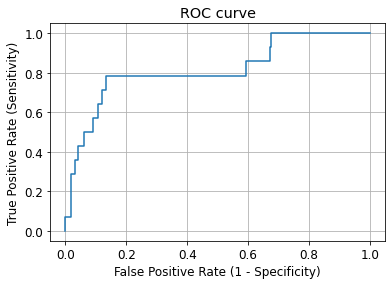

In [ ]:
y_pred_prob = algoritmo.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
from sklearn.model_selection import cross_val_score
print('AUC:',cross_val_score(algoritmo, X, y, cv=10, scoring='roc_auc').mean())

AUC: 0.7044896728478818


***Regresión Logística***

In [ ]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression(max_iter = 10000)
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo Regresión Logística:')
print(accuracy)

Exactitud del modelo Regresión Logística:
0.9226519337016574


In [ ]:
from sklearn import metrics

print('Matriz de confusión:')
print(metrics.confusion_matrix(y_test, y_pred))

confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

print('Classification error:',1 - metrics.accuracy_score(y_test, y_pred))

print('Sensitivity: ',metrics.recall_score(y_test, y_pred))

specificity = TN / (TN + FP)
print('Specificity: ',specificity)

print('False positive rate:',1 - specificity)

print('Precision: ',metrics.precision_score(y_test, y_pred))

Matriz de confusión:
[[165   2]
 [ 12   2]]
Accuracy:  0.9226519337016574
Classification error: 0.07734806629834257
Sensitivity:  0.14285714285714285
Specificity:  0.9880239520958084
False positive rate: 0.0119760479041916
Precision:  0.5


In [ ]:
algoritmo.predict_proba(X_test)[0:10, 1]

array([0.532, 0.022, 0.008, 0.053, 0.007, 0.005, 0.088, 0.005, 0.009,
       0.024])

AUC: 0.8545793758480326


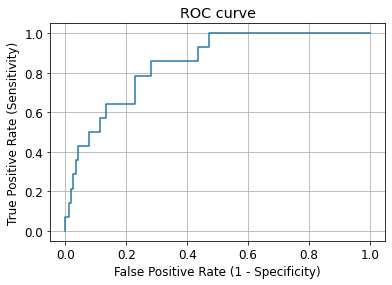

In [ ]:
y_pred_prob = algoritmo.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

from sklearn.model_selection import cross_val_score
print('AUC:',cross_val_score(algoritmo, X, y, cv=10, scoring='roc_auc').mean())

Realizamos el ajuste de hiperparámetros para ver si el modelo puede mejorar:

In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.924557 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
algoritmo = LogisticRegression(max_iter = 1000,C = 0.01, penalty = 'l2',solver = 'liblinear')
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo Regresión Logística con hiperparámetros:')
print(accuracy)

Exactitud del modelo Regresión Logística con hiperparámetros:
0.9226519337016574


El ajuste de hiperparámetros no cambia el resultado inicial.

***Arboles de decisión***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
algoritmo = DecisionTreeClassifier(criterion = 'entropy')
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo Arboles de Decisión:')
print(accuracy)

Exactitud del modelo Arboles de Decisión:
0.9060773480662984


In [ ]:
from sklearn import metrics

print('Matriz de confusión:')
print(metrics.confusion_matrix(y_test, y_pred))

confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

print('Classification error:',1 - metrics.accuracy_score(y_test, y_pred))

print('Sensitivity: ',metrics.recall_score(y_test, y_pred))

specificity = TN / (TN + FP)
print('Specificity: ',specificity)

print('False positive rate:',1 - specificity)

print('Precision: ',metrics.precision_score(y_test, y_pred))

Matriz de confusión:
[[156  11]
 [  6   8]]
Accuracy:  0.9060773480662984
Classification error: 0.09392265193370164
Sensitivity:  0.5714285714285714
Specificity:  0.9341317365269461
False positive rate: 0.06586826347305386
Precision:  0.42105263157894735


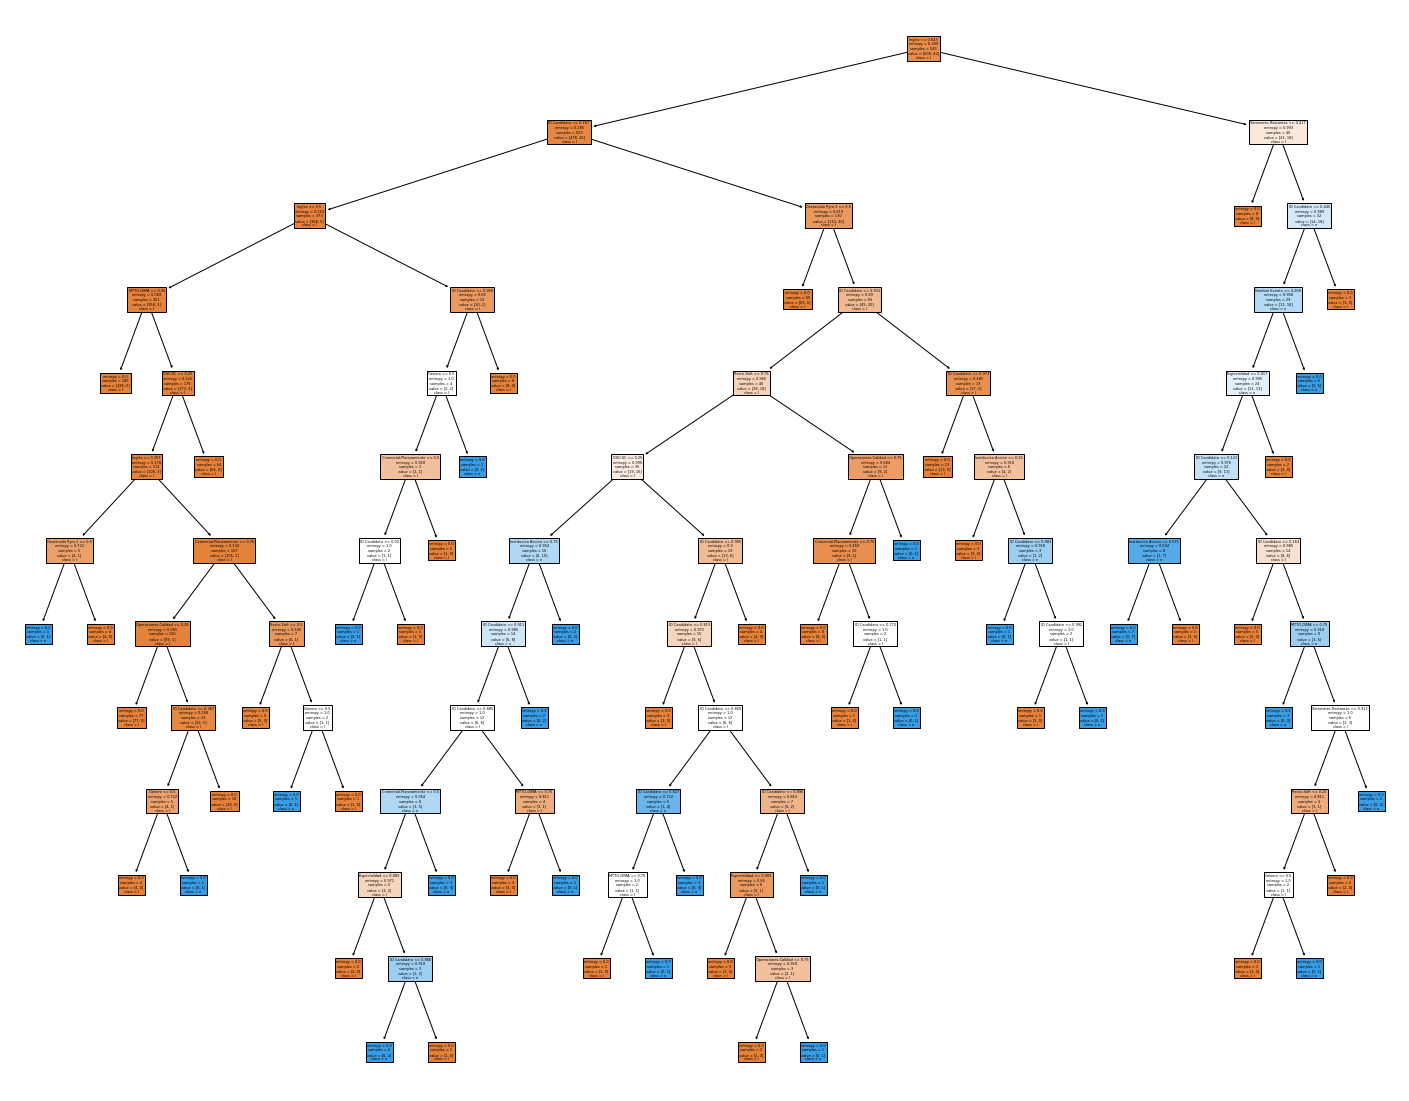

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(algoritmo,
                   feature_names=X.columns,
                   class_names=y.name,
                   filled=True)

In [ ]:
algoritmo.predict_proba(X_test)[0:10, 1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

AUC: 0.5100520126639531


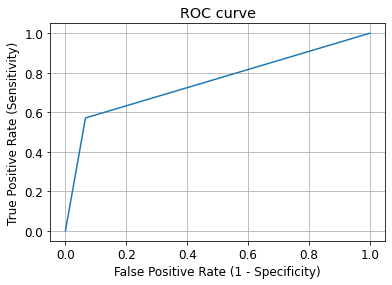

In [ ]:
y_pred_prob = algoritmo.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

from sklearn.model_selection import cross_val_score
print('AUC:',cross_val_score(algoritmo, X, y, cv=10, scoring='roc_auc').mean())

***Bosques Aleatorios***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
algoritmo = RandomForestClassifier()
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo Bosques Aleatorios:')
print(accuracy)

Exactitud del modelo Bosques Aleatorios:
0.9281767955801105


In [ ]:
from sklearn import metrics

print('Matriz de confusión:')
print(metrics.confusion_matrix(y_test, y_pred))

confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

print('Classification error:',1 - metrics.accuracy_score(y_test, y_pred))

print('Sensitivity: ',metrics.recall_score(y_test, y_pred))

specificity = TN / (TN + FP)
print('Specificity: ',specificity)

print('False positive rate:',1 - specificity)

print('Precision: ',metrics.precision_score(y_test, y_pred))

Matriz de confusión:
[[163   4]
 [  9   5]]
Accuracy:  0.9281767955801105
Classification error: 0.07182320441988954
Sensitivity:  0.35714285714285715
Specificity:  0.9760479041916168
False positive rate: 0.0239520958083832
Precision:  0.5555555555555556


In [ ]:
algoritmo.predict_proba(X_test)[0:10, 1]

array([0.18, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

AUC: 0.7526613146389266


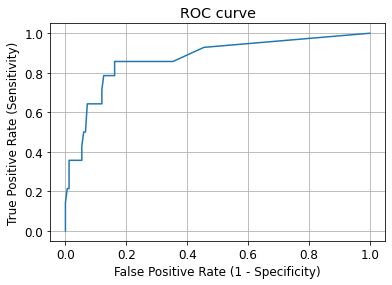

In [ ]:
y_pred_prob = algoritmo.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

from sklearn.model_selection import cross_val_score
print('AUC:',cross_val_score(algoritmo, X, y, cv=10, scoring='roc_auc').mean())

Hacemos un ajuste de hiperparámetros para ver si el modelo puede mejorar:

In [ ]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
forest = RandomForestClassifier(random_state = 1)

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split,
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1,
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [ ]:
print(bestF.best_score_)
print(bestF.best_params_)

0.9226519337016574
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 300}


In [ ]:
forest = RandomForestClassifier(random_state = 1, n_estimators = 300, min_samples_split = 15,max_depth = 5,min_samples_leaf = 1)
forest.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo Bosques Aleatorios con hiperparámetros:')
print(accuracy)

Exactitud del modelo Bosques Aleatorios con hiperparámetros:
0.9281767955801105


***Gradient Boosting***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
algoritmo = GradientBoostingClassifier()
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo Gradient Boosting:')
print(accuracy)

Exactitud del modelo Gradient Boosting:
0.9226519337016574


In [ ]:
from sklearn import metrics

print('Matriz de confusión:')
print(metrics.confusion_matrix(y_test, y_pred))

confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

print('Classification error:',1 - metrics.accuracy_score(y_test, y_pred))

print('Sensitivity: ',metrics.recall_score(y_test, y_pred))

specificity = TN / (TN + FP)
print('Specificity: ',specificity)

print('False positive rate:',1 - specificity)

print('Precision: ',metrics.precision_score(y_test, y_pred))

Matriz de confusión:
[[163   4]
 [ 10   4]]
Accuracy:  0.9226519337016574
Classification error: 0.07734806629834257
Sensitivity:  0.2857142857142857
Specificity:  0.9760479041916168
False positive rate: 0.0239520958083832
Precision:  0.5


In [ ]:
algoritmo.predict_proba(X_test)[0:10, 1]

array([0.063, 0.009, 0.004, 0.005, 0.005, 0.003, 0.012, 0.004, 0.002,
       0.003])

AUC: 0.6741858887381275


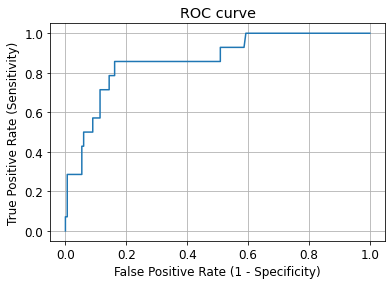

In [ ]:
y_pred_prob = algoritmo.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

from sklearn.model_selection import cross_val_score
print('AUC:',cross_val_score(algoritmo, X, y, cv=10, scoring='roc_auc').mean())

***Redes Neuronales***

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train,y_train)

predict_train_MLP = mlp.predict(X_train)
predict_test_MLP = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
from sklearn import metrics

print('Matriz de confusión:')
print(metrics.confusion_matrix(y_test, predict_test_MLP))

confusion = metrics.confusion_matrix(y_test, predict_test_MLP)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Accuracy: ',metrics.accuracy_score(y_test, predict_test_MLP))

print('Classification error:',1 - metrics.accuracy_score(y_test, predict_test_MLP))

print('Sensitivity: ',metrics.recall_score(y_test, predict_test_MLP))

specificity = TN / (TN + FP)
print('Specificity: ',specificity)

print('False positive rate:',1 - specificity)

print('Precision: ',metrics.precision_score(y_test, predict_test_MLP))

Matriz de confusión:
[[159   8]
 [  9   5]]
Accuracy:  0.9060773480662984
Classification error: 0.09392265193370164
Sensitivity:  0.35714285714285715
Specificity:  0.9520958083832335
False positive rate: 0.04790419161676651
Precision:  0.38461538461538464


In [ ]:
algoritmo.predict_proba(X_test)[0:10, 1]

array([0.063, 0.009, 0.004, 0.005, 0.005, 0.003, 0.012, 0.004, 0.002,
       0.003])

AUC: 0.668165988240615


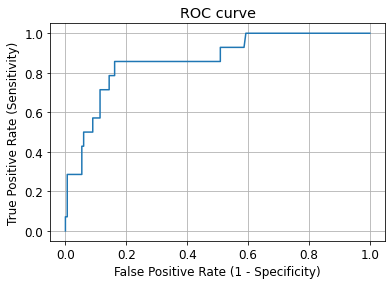

In [ ]:
y_pred_prob = algoritmo.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

from sklearn.model_selection import cross_val_score
print('AUC:',cross_val_score(algoritmo, X, y, cv=10, scoring='roc_auc').mean())

***Cross Validation para todos los modelos***

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=10)

KNN= KNeighborsClassifier()
SVC= SVC(probability=True)
LR= LogisticRegression(max_iter = 100000)
DT= DecisionTreeClassifier()
GNB= GaussianNB()
RF= RandomForestClassifier()
GB= GradientBoostingClassifier()

print('k-Near Neighbors: ', cross_val_score(KNN, X, y, cv=skf).mean())
print('Support Vector Classifier: ', cross_val_score(SVC, X, y, cv=skf).mean())
print('Logistic Regression: ',cross_val_score(LR, X, y, cv=skf).mean())
print('Decision Tree: ', cross_val_score(DT, X, y, cv=skf).mean())
print('GaussianNB: ', cross_val_score(GNB, X, y, cv=skf).mean())
print('Random Forest: ', cross_val_score(RF, X, y, cv=skf).mean())
print('Gradient Boosting: ', cross_val_score(GB, X, y, cv=skf).mean())
print('Redes Neuroales: ', cross_val_score(mlp, X, y, cv=skf).mean())

k-Near Neighbors:  0.9088470319634702
Support Vector Classifier:  0.9171803652968036
Logistic Regression:  0.9198820395738203
Decision Tree:  0.5528919330289193
GaussianNB:  0.4195966514459665
Random Forest:  0.8312024353120243
Gradient Boosting:  0.6937404870624049


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Redes Neuroales:  0.8839992389649923


Haciendo una comparación de los modelos, se puede determinar lo siguiente:

- Modelo con mayor exactitud: Bosques aleatorios
- Modelo con mayor precisión: Bosques aleatorios
- Modelo con mayor AUC: Regresión Logística
- Modelo con mayor Cross-Validation score: Regresión Logística

Por lo tanto, cualquiera de los dos modelos es bueno prediciendo si un candidato ingresa Ternium o no.

**6)Describe el proceso realizado y presenta tus conclusiones al respecto**

Despues de aplicar los distintos modelos de Machine Learning, análizar su matriz de confusión, su ROC-AUC, su Cross-Validation y ver si podrían mejorar con distintos hiperparámetros, podemos determinar que el mejor modelo a utilizar puede ser Random Forest o Regresión Logística. Los resultados de ambos modelos demestran que son mas de 90% confiables al predecir si los candidatos pueden entrar a Ternium o no.

# Guardar modelo

In [ ]:
import pickle

In [ ]:
filename = 'ternium_model.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('ternium_model.pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9171270718232044


In [ ]:
data = {"model": knn, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)